<a href="https://colab.research.google.com/github/abrusebas1997/FasTrackFix-dataset-SF/blob/main/Intensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of repair stores in San Francisco

My goal for this project is to get, organize, and analyze data for a [repair platform](https://fastrackfix.com) that is starting in San Francisco( and needs to have a database of all possible repair shops that could enter in this platform.  Also, I want to group shops depending on their zip code and specialties.

First, I had to make my own dataset because I couldn't find any other that fits my purpose. 


### The columns I'll be using for this dataset are:

* Business Name
* Neighborhood
* Business location start date
* Years doing business
* Street Address
* City
* State
* Zipcode
* Specialty
* Services
* Email
* Phone Number



###Importing data

I will import my .csv file to Google Colab.

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving Repair Shops SF  - Sheet1.csv to Repair Shops SF  - Sheet1.csv


With this line of code, the uploaded dataset will be saved into Google Colab



In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Repair Shops SF  - Sheet1.csv']))

All my imports will be in this cell



In [ ]:
# Imports
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cluster import KMeans

## Analysis

Taking a look at the dataset and checking if there are any null values



In [ ]:
print(df.head(10))
df.isnull().sum() 

                                       Business Name  ...    Phone Number
0               Mobile iPhone Repair SF | Gelatotech  ...  (415) 621-9055
1                          Mission Wireless & Repair  ...  (415) 878-5059
2                                            SFCOMPY  ...  (415) 508-3660
3  Sweet Memory IT Support & Computer Repair-iPho...  ...  (415) 288-9470
4                                           Compupod  ...  (855) 349-4763
5                                  SF Smart Wireless  ...  (650) 686-9998
6                                    Fix My Phone SF  ...  (415) 731-9375
7   Mobile Fix Certified iphone ipad computer repair  ...  (415) 810-0511
8                                           Compufon  ...  (415) 825-5438
9                                   iPhone Repair SF  ...  (415) 483-9625

[10 rows x 12 columns]


Business Name                    0
Neighborhood                     3
Business location start date    17
Years doing business             0
Street Address                   0
City                             0
State                            0
Zipcode                          0
Specialty                        0
Services                         0
Email                           24
Phone Number                     1
dtype: int64

Getting the dimensions of this dataset(rows, columns)



In [ ]:
print(df.shape)

(50, 12)


Distributing data



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Business Name                 50 non-null     object
 1   Neighborhood                  47 non-null     object
 2   Business location start date  33 non-null     object
 3   Years doing business          50 non-null     int64 
 4   Street Address                50 non-null     object
 5   City                          50 non-null     object
 6   State                         50 non-null     object
 7   Zipcode                       50 non-null     object
 8   Specialty                     50 non-null     object
 9   Services                      50 non-null     object
 10  Email                         26 non-null     object
 11  Phone Number                  49 non-null     object
dtypes: int64(1), object(11)
memory usage: 4.8+ KB
None


In [ ]:
print(df.describe())

       Years doing business
count             50.000000
mean              11.320000
std               10.057873
min                1.000000
25%                4.250000
50%                7.000000
75%               15.000000
max               42.000000


In [ ]:
df.groupby("Zipcode")["Business Name"].count()

Zipcode
94080      1
94102      3
94103     10
94108      5
94109      7
94110      4
94111      2
94112      3
94114      1
94115      2
94116      1
94117      3
94118      1
94122      1
94123      3
94132      1
94158      1
Mobile     1
Name: Business Name, dtype: int64

There are more repair shops in the zip code 94103 (10 shops) than everywhere else, 94109 (7 shops), and 94108 (5 shops).

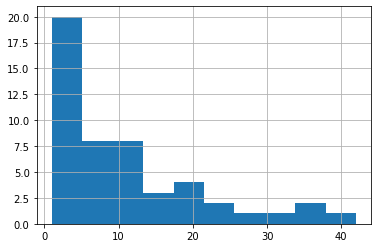

In [ ]:
df['Years doing business'].hist()

The majority of repair shops are almost new and started 4 years ago. 

###Displaying the whole dataset with filters

In [ ]:
# Another way to display more content is to use DataTable to display pandas dataframe
# %load_ext google.colab.data_table
df

,Business Name,Neighborhood,Business location start date,Years doing business,Street Address,City,State,Zipcode,Specialty,Services,Email,Phone Number
0,Mobile iPhone Repair SF | Gelatotech,Mission Bay,NaN,3,Mobile service,San Francisco,CA,94158,Electronics,Phone repair,support@gelatotech.com,(415) 621-9055
1,Mission Wireless & Repair,Mission,2015-05-13,6,2776 Mission St,San Francisco,CA,94110,Electronics,Electronics Repair,missionwireless1@gmail.com,(415) 878-5059
2,SFCOMPY,Mobile,NaN,15,Mobile service,San Francisco,CA,Mobile,Electronics,Computer repair and IT services,info@sfcompy.com,(415) 508-3660
3,Sweet Memory IT Support & Computer Repair-iPho...,Financial District/South Beach,1999-10-03,22,545 Sansome St suite e,San Francisco,CA,94111,Electronics,Computer repair and IT services,service@sweetmemory.com,(415) 288-9470
4,Compupod,Mission,2016-10-01,5,2433 Mission St,San Francisco,CA,94110,Electronics,Electronics Repair,support@compupodsf.com,(855) 349-4763
5,SF Smart Wireless,Mission,2013-09-12,8,3007 Mission St,San Francisco,CA,94110,Electronics,Phone repair,info@sfsmartwireless.com,(650) 686-9998
6,Fix My Phone SF,NaN,NaN,7,842 Cole St,San Francisco,CA,94117,Electronics,Phone repair,NaN,(415) 731-9375
7,Mobile Fix Certified iphone ipad computer repair,Inner Sunset,2014-10-20,7,1099 Irving St,San Francisco,CA,94122,Electronics,Electronics Repair,mobilefix01@gmail.com,(415) 810-0511
8,Compufon,Mission,2017-05-05,2,4790 Mission St,San Francisco,CA,94112,Electronics,Electronics Repair,NaN,(415) 825-5438
9,iPhone Repair SF,NaN,NaN,10,3016 16th St #208,San Francisco,CA,94103,Electronics,Phone repair,iPhoneRepairSF@gmail.com,(415) 483-9625


In [ ]:
df.groupby("Specialty")["Neighborhood"].count()

Specialty
Accesories     14
Appliances      6
Bike            7
Electronics    16
Furniture       1
Instruments     2
Scooter         1
Name: Neighborhood, dtype: int64

The most popular type of repair shop in San Francisco is the ones that repair Electronics (16 shops). The second is  repair shops for Accesories (14 shops). And the least popular repair shops in SF are the ones that repair Scooters (1 shops) and Furniture (1 shops)




In [ ]:
df.groupby("Neighborhood")["Specialty"].count()

Neighborhood
Castro/Upper Market               1
Excelsior                         1
Fillmore                          1
Financial District/South Beach    8
Golden Gate Park                  1
Haight Ashbury                    1
Hayes Valley                      2
Inner Sunset                      1
Marina                            3
Market                            1
Mission                           8
Mission Bay                       1
Mobile                            2
Nob Hill                          4
Outer Richmond                    1
Pacific Heights                   1
Russian Hill                      1
South SF                          1
South of Market                   6
Sunset/Parkside                   1
Tenderloin                        1
Name: Specialty, dtype: int64

The neighborhoods with more repair shops in the city are The Mission and Financial District/South Beach.